<a href="https://colab.research.google.com/github/pywolf1503/LinearProgramming/blob/main/Copie_de_classification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Downloading, Installing

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.25.2
matplotlib: 3.7.1
pandas: 2.0.3
sklearn: 1.2.2


# 2. Load The Data

### 2.1 Import libraries

In [83]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score,RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.datasets import load_iris
from scipy.stats import uniform, randint
import warnings



### 2.2 Load Dataset

In [ ]:
# Load dataset
dataset = pandas.read_csv("iris.csv")

# 3. Summarize the Dataset

### 3.1 Dimensions of Dataset

In [ ]:
#Dimensions of Dataset (rows,columns)
# shape
print(dataset.shape)

(150, 5)


### 3.2 Peek at the Data

In [ ]:
#Peek at the Data
# head
print(dataset.head(21))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

### 3.3 Statistical Summary

In [ ]:
#Statistical Summary
#This includes the count, mean, the min and max values as well as some percentiles.
# descriptions
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 3.4 Class Distribution

In [ ]:
# class distribution
# look at the number of instances (rows) that belong to each class
print(dataset.groupby('species').size())


species
setosa        50
versicolor    50
virginica     50
dtype: int64


# 4. Data Visualization

### 4.1 Univariate Plots

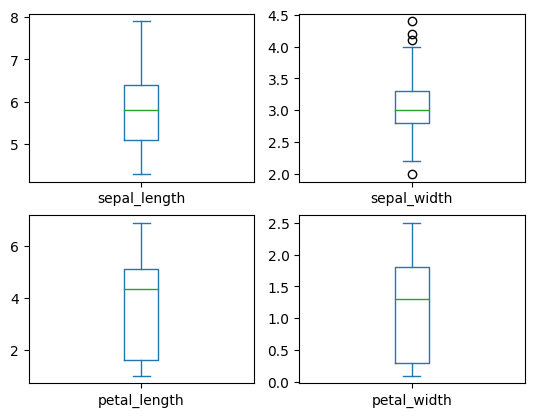

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

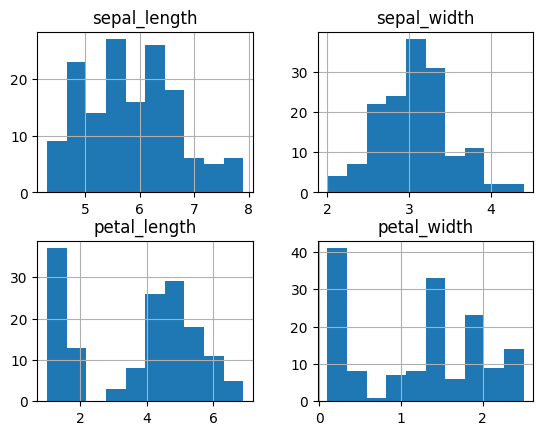

In [ ]:
# histograms
dataset.hist()
pyplot.show()

### 4.2 Multivariate Plots

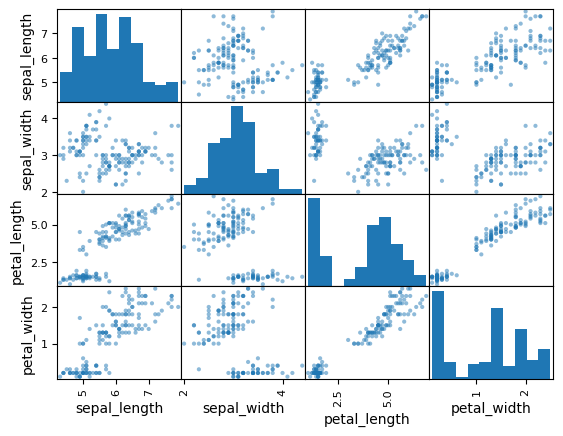

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# 5. Evaluate Some Algorithms

### 5.1 Create a Validation Dataset

In [ ]:
# Split-out validation dataset 80 train , 20 test
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

### 5.2 Before Tuning

In [107]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('SVM_linear', SVC()))
models.append(('SVM_poly', SVC()))
models.append(('GP', GaussianProcessClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Test options and evaluation metric
	kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.966667 (0.040825)
RF: 0.958333 (0.041667)
GB: 0.958333 (0.041667)
AdaBoost: 0.925000 (0.058333)
SVM_linear: 0.966667 (0.040825)
SVM_poly: 0.966667 (0.040825)
GP: 0.966667 (0.040825)


In [115]:
for model_name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(f"{model_name}",accuracy_score(Y_validation, predictions))

LR 0.9666666666666667
LDA 1.0
KNN 1.0
CART 0.9666666666666667
NB 0.9666666666666667
SVM 0.9666666666666667
RF 0.9666666666666667
GB 0.9666666666666667
AdaBoost 0.9666666666666667
SVM_linear 0.9666666666666667
SVM_poly 0.9666666666666667
GP 0.9666666666666667


### **Tuning script, (try random numbers and diffrent params)**



LR: Best Accuracy: 0.9666666666666666 | Best Parameters: {'C': 4.171220047025741}
KNN: Best Accuracy: 0.9800000000000001 | Best Parameters: {'n_neighbors': 13}
CART: Best Accuracy: 0.96 | Best Parameters: {'max_depth': 5, 'min_samples_leaf': 3}
SVM: Best Accuracy: 0.9800000000000001 | Best Parameters: {'C': 2.3618897695197605, 'kernel': 'rbf'}
RF: Best Accuracy: 0.9600000000000002 | Best Parameters: {'max_features': 'sqrt', 'n_estimators': 121}
GB: Best Accuracy: 0.9533333333333334 | Best Parameters: {'learning_rate': 0.218511002351287, 'n_estimators': 190}
AdaBoost: Best Accuracy: 0.9466666666666667 | Best Parameters: {'n_estimators': 129}
SVM_linear: Best Accuracy: 0.9866666666666667 | Best Parameters: {'C': 0.924385947687978}
SVM_poly: Best Accuracy: 0.9800000000000001 | Best Parameters: {'C': 0.924385947687978, 'degree': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GP: Best Accuracy: 0.9666666666666666 | Best Parameters: {}

Best Parameters for Each Model:
LR: {'C': 4.171220047025741}
KNN: {'n_neighbors': 13}
CART: {'max_depth': 5, 'min_samples_leaf': 3}
SVM: {'C': 2.3618897695197605, 'kernel': 'rbf'}
RF: {'max_features': 'sqrt', 'n_estimators': 121}
GB: {'learning_rate': 0.218511002351287, 'n_estimators': 190}
AdaBoost: {'n_estimators': 129}
SVM_linear: {'C': 0.924385947687978}
SVM_poly: {'C': 0.924385947687978, 'degree': 2}
GP: {}


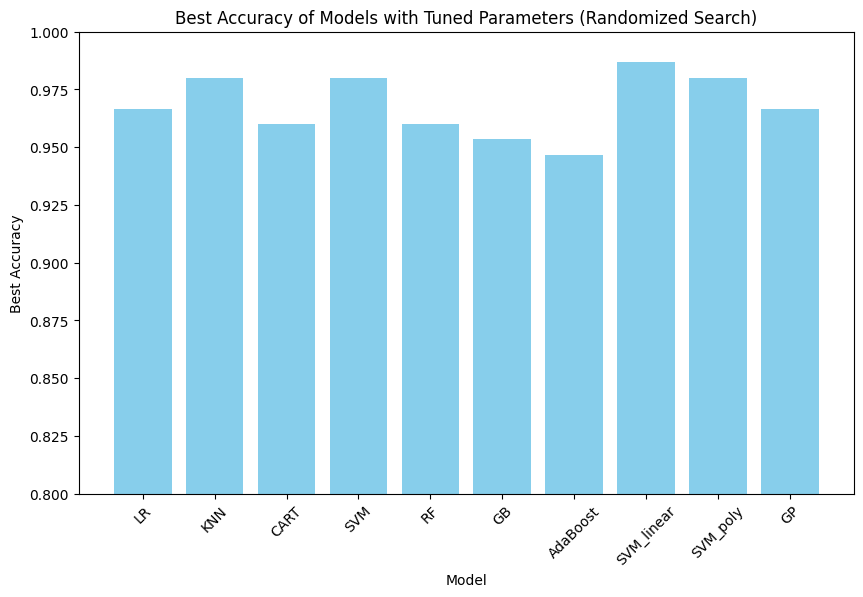

In [88]:
warnings.simplefilter(action='ignore', category=FutureWarning)

modelss = {
    'LR': (LogisticRegression(solver='liblinear', multi_class='ovr'), {'C': uniform(0.001, 10)}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': randint(1, 20)}),
    'CART': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 20], 'min_samples_leaf': randint(1, 10)}),
    'SVM': (SVC(gamma='auto'), {'C': uniform(0.001, 10), 'kernel': ['linear', 'rbf']}),
    'RF': (RandomForestClassifier(), {'n_estimators': randint(50, 200), 'max_features': ['auto', 'sqrt', 'log2']}),
    'GB': (GradientBoostingClassifier(), {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.5)}),
    'AdaBoost': (AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)), {'n_estimators': randint(50, 200)}),
    'SVM_linear': (SVC(kernel='linear'), {'C': uniform(0.001, 10)}),
    'SVM_poly': (SVC(kernel='poly', degree=3), {'C': uniform(0.001, 10), 'degree': randint(2, 5)}),
    'GP': (GaussianProcessClassifier(), {})
}
results = []
best_params = {}
for name, (model, param_distributions) in modelss.items():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=kfold, scoring='accuracy', random_state=1)
    random_search.fit(X, Y)
    results.append(random_search.best_score_)
    best_params[name] = random_search.best_params_
    print(f'{name}: Best Accuracy: {random_search.best_score_} | Best Parameters: {random_search.best_params_}')
print("\nBest Parameters for Each Model:")
for name, params in best_params.items():
    print(f'{name}: {params}')
pyplot.figure(figsize=(10, 6))
pyplot.bar(modelss.keys(), results, color='skyblue')
pyplot.xlabel('Model')
pyplot.ylabel('Best Accuracy')
pyplot.title('Best Accuracy of Models with Tuned Parameters (Randomized Search)')
pyplot.xticks(rotation=45)
pyplot.ylim(0.8, 1.0)
pyplot.show()

### **After tuning**

In [125]:
models = []
models.append(('LR', LogisticRegression(C=4.171220047025741,solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('CART', DecisionTreeClassifier(max_depth=5,min_samples_leaf=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear',C=2.3618897695197605)))

models.append(('RF', RandomForestClassifier(max_features='sqrt',n_estimators= 151)))
models.append(('GB', GradientBoostingClassifier(learning_rate=0.218511002351287,n_estimators=190)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=129)))
models.append(('SVM_linear', SVC(C=0.924385947687978)))
models.append(('SVM_poly', SVC(C=0.924385947687978,degree=2)))
models.append(('GP', GaussianProcessClassifier()))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.975000 (0.038188)
CART: 0.958333 (0.055902)
NB: 0.950000 (0.055277)
SVM: 0.975000 (0.038188)
RF: 0.950000 (0.040825)
GB: 0.958333 (0.041667)
AdaBoost: 0.941667 (0.053359)
SVM_linear: 0.966667 (0.040825)
SVM_poly: 0.966667 (0.040825)
GP: 0.966667 (0.040825)


In [128]:
for model_name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(f"{model_name}",accuracy_score(Y_validation, predictions))

LR 0.9666666666666667
LDA 1.0
KNN 0.9666666666666667
CART 0.9666666666666667
NB 0.9666666666666667
SVM 1.0
RF 0.9666666666666667
GB 0.9666666666666667
AdaBoost 0.9666666666666667
SVM_linear 0.9666666666666667
SVM_poly 0.9666666666666667
GP 0.9666666666666667


### 5.3 Select Best Model

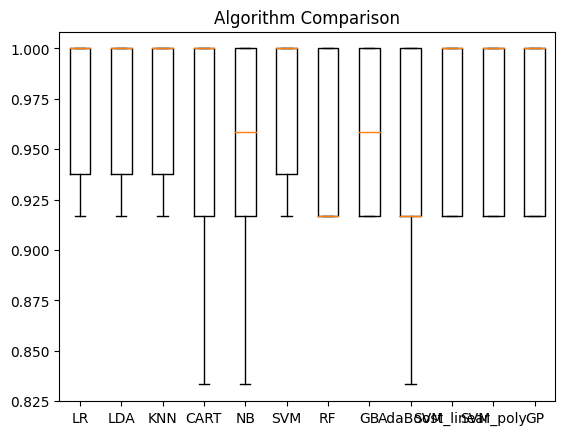

In [94]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# 6. Make Predictions

### 6.1 Make Predictions

In [112]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)


### 6.2 Evaluate Predictions

In [113]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Confusion_Matrix تفاصيل

In [ ]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [ ]:
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(Y_validation, predictions, labels=['setosa', 'versicolor','virginica']),
    index=['true:setosa', 'true:versicolor','true:virginica'],
    columns=['pred:setosa', 'pred:versicolor','pred:virginica']
)
print(cmtx)

                 pred:setosa  pred:versicolor  pred:virginica
true:setosa               11                0               0
true:versicolor            0               12               1
true:virginica             0                0               6
